# Predicting Student Exam Scores Using Regression

This project aims to predict student exam scores using various academic and demographic factors. It demonstrates the complete data science pipeline—from preprocessing to model evaluation.

## Objective
- Predict the `Exam_Score` based on variables like Study Hours, Attendance Rate, Parental Education, and Tutoring Sessions.
- Explore data insights and build an interpretable regression model.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Dataset Overview
This dataset contains **6607 student records** with variables such as:
- `Study_Hours`
- `Attendance_Rate`
- `Parental_Education`
- `Tutoring_Sessions`
- `Exam_Score` *(Target)*

In [2]:
#Dataset Description
df = pd.read_csv("C:\\Users\\sahil\\Downloads\\StudentPerformanceFactors.csv")

# Basic info of the Dataset
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for unique values in selected categorical columns
categorical_cols = ['Parental_Involvement']
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Shape of the dataset: (6607, 20)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-n

## Exploratory Data Analysis (EDA)
We’ll now visualize feature relationships, detect correlations, and inspect distributions.

In [3]:
#EDA (Exploratory Data Analysis)
# Set visual style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Summary statistics
print("Summary of selected numeric variables:")
print(df[["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions", "Exam_Score"]].describe())

# 2. Check for missing values
print("\nMissing values:")
print(df[["Hours_Studied", "Previous_Scores", "Parental_Involvement", "Attendance", "Tutoring_Sessions", "Exam_Score"]].isnull().sum())


Summary of selected numeric variables:
       Hours_Studied  Previous_Scores   Attendance  Tutoring_Sessions  \
count    6607.000000      6607.000000  6607.000000        6607.000000   
mean       19.975329        75.070531    79.977448           1.493719   
std         5.990594        14.399784    11.547475           1.230570   
min         1.000000        50.000000    60.000000           0.000000   
25%        16.000000        63.000000    70.000000           1.000000   
50%        20.000000        75.000000    80.000000           1.000000   
75%        24.000000        88.000000    90.000000           2.000000   
max        44.000000       100.000000   100.000000           8.000000   

        Exam_Score  
count  6607.000000  
mean     67.235659  
std       3.890456  
min      55.000000  
25%      65.000000  
50%      67.000000  
75%      69.000000  
max     101.000000  

Missing values:
Hours_Studied           0
Previous_Scores         0
Parental_Involvement    0
Attendance         

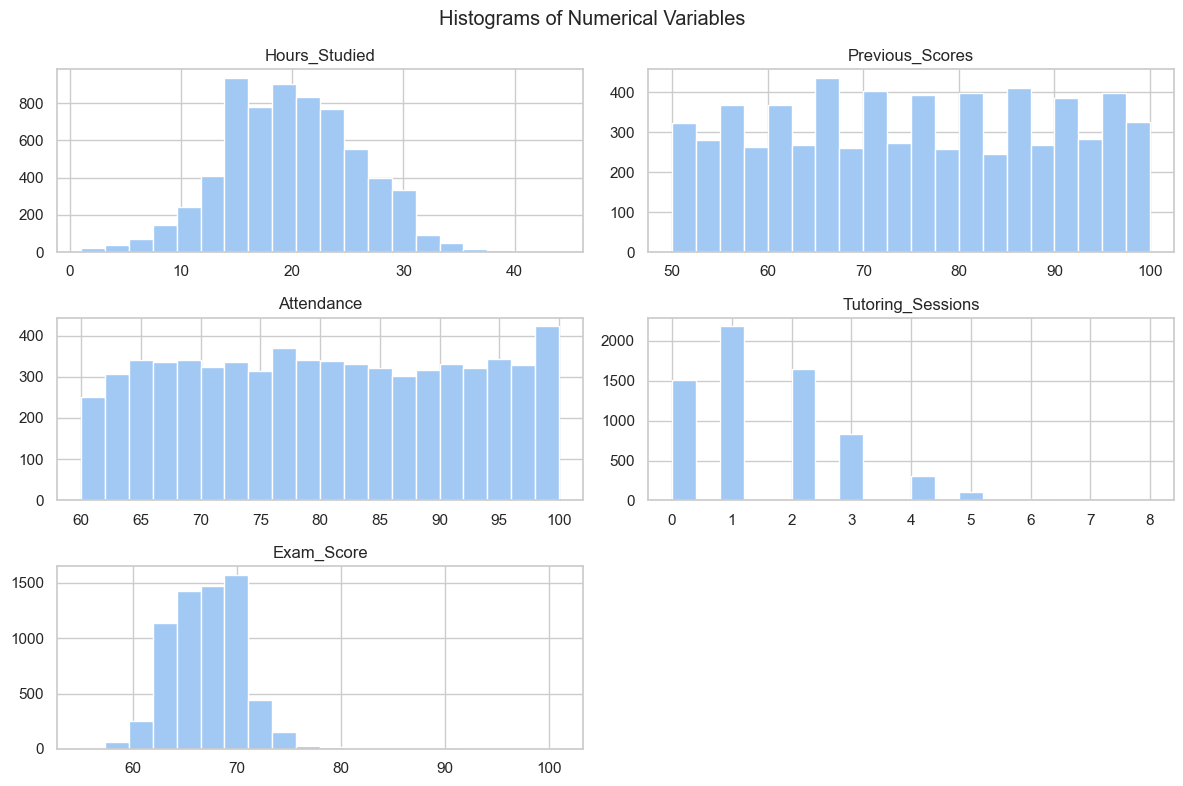

In [4]:
# 3. Histograms
df[["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions", "Exam_Score"]].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

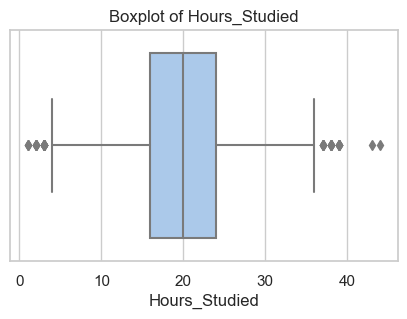

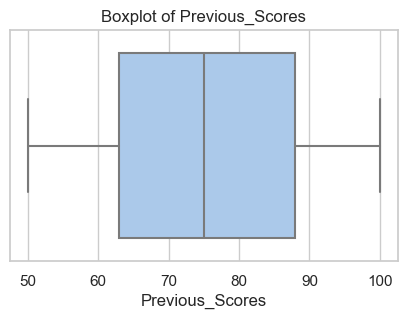

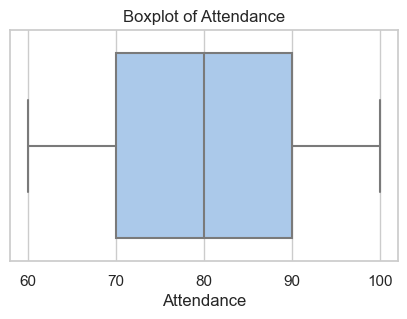

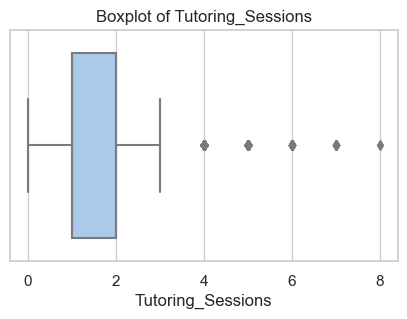

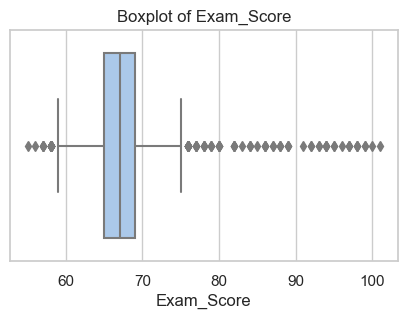

In [5]:
# 4. Boxplots
for col in ["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions", "Exam_Score"]:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

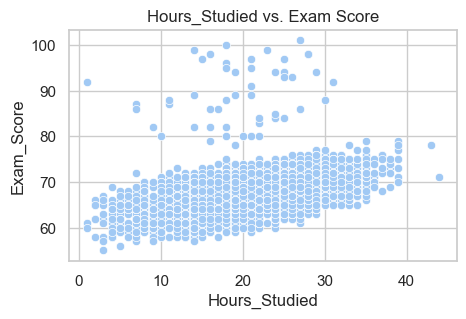

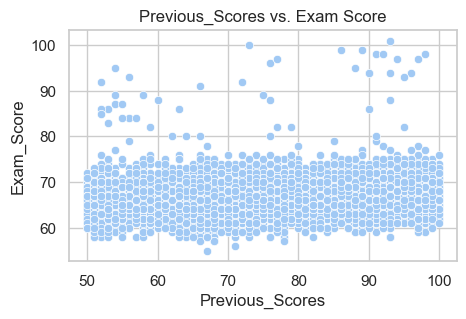

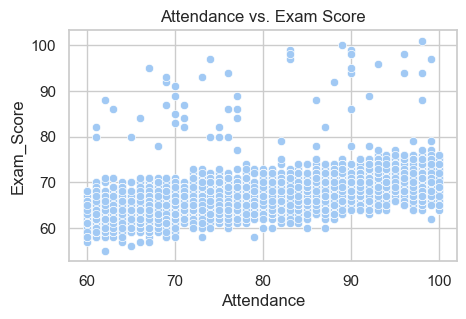

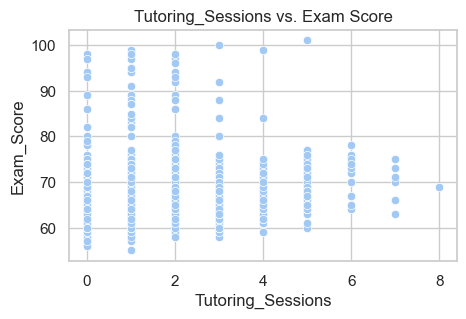

In [6]:
# 5. Scatter plots vs. Target Variable (Exam Score)
for col in ["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions"]:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=col, y="Exam_Score", data=df)
    plt.title(f"{col} vs. Exam Score")
    plt.show()

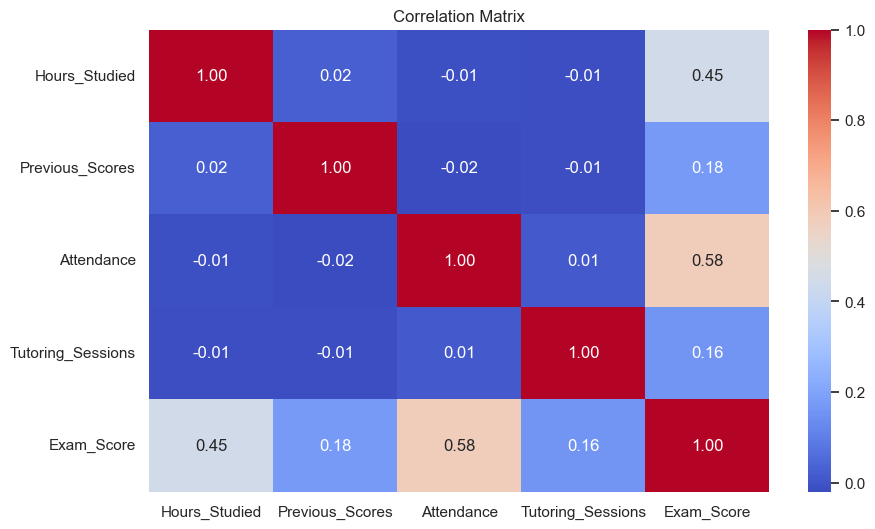

In [7]:
# 6. Correlation heatmap
numeric_cols = ["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions", "Exam_Score"]
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
#Data Preprocessing
# Step 1: Impute missing values with mean (only for numeric columns)
numeric_cols = ["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions", "Exam_Score"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Step 2: Encode 'Parental_Involvement' using LabelEncoder
le = LabelEncoder()
df['Parental_Involvement'] = df['Parental_Involvement']
df['Parental_Involvement_Encoded'] = le.fit_transform(df['Parental_Involvement'])

# Step 3: Feature scaling (for numeric features)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Prepare final dataset for modeling
X = df_scaled[["Hours_Studied", "Previous_Scores", "Attendance", "Tutoring_Sessions", "Parental_Involvement_Encoded"]]
y = df_scaled["Exam_Score"]

print("Preprocessing complete. Features ready for modeling.")


Preprocessing complete. Features ready for modeling.


# Model Building
We will train and compare the following models:
- Linear Regression
- Random Forest Regressor

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
#Creating the Model 
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train the Random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Coefficients and Intercept
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
})

print("Intercept:", lr_model.intercept_)


Intercept: 0.13740284911050765


In [12]:
#Predictions
y_pred = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics

In [13]:
#Random forest Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation Metrics:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Evaluation Metrics:
RMSE: 0.63
R² Score: 0.57


In [18]:
#Linear Regression Metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Linear Regression Evaluation Metrics:
R-squared: 0.6484
Adjusted R-squared: 0.6470
Mean Absolute Error (MAE): 0.3208
Root Mean Squared Error (RMSE): 0.5731


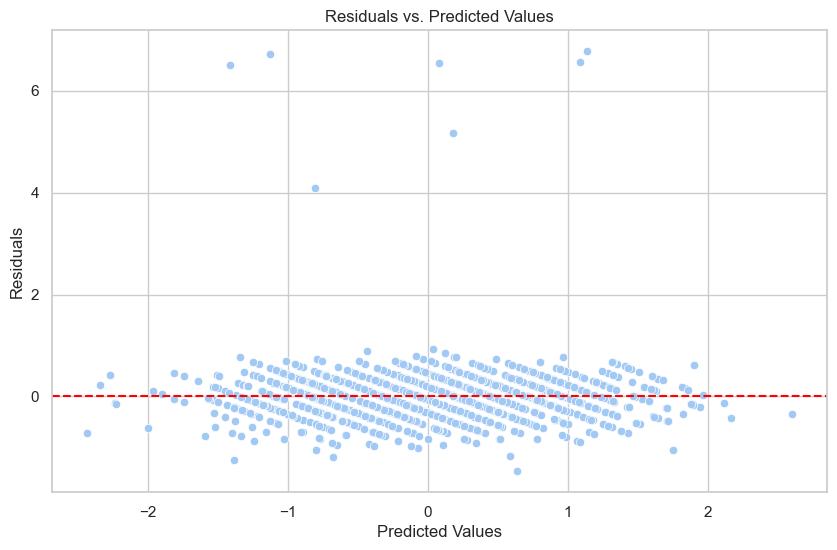

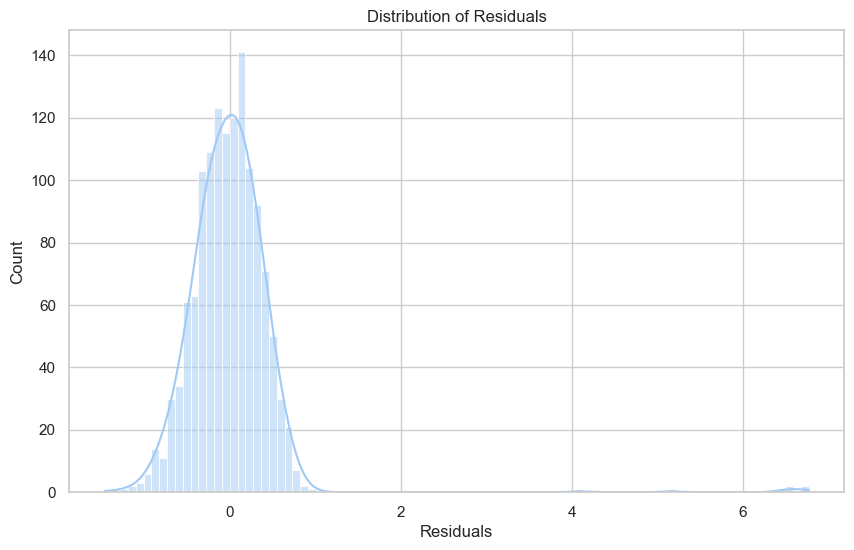

In [19]:
# Residuals (Assumption Check)
residuals = y_test - y_pred

#Residuals vs. Predicted (Check for homoscedasticity)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# 2. Distribution of Residuals (Check for normality)
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

# Results

In [20]:
# Linear regression Metrics prediction
coefficients["abs_coef"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="abs_coef", ascending=False).drop(columns=["abs_coef"])

print("\nFeature Importance from Linear Regression:")
print(coefficients)


Feature Importance from Linear Regression:
                        Feature  Coefficient
2                    Attendance     0.588556
0                 Hours_Studied     0.446619
1               Previous_Scores     0.178771
3             Tutoring_Sessions     0.160862
4  Parental_Involvement_Encoded    -0.112575


In [21]:
#Random Forest metrics prediction
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances from Random Forest:")
print(importances)


Feature Importances from Random Forest:
                        Feature  Importance
2                    Attendance    0.428605
0                 Hours_Studied    0.285589
1               Previous_Scores    0.165161
3             Tutoring_Sessions    0.071708
4  Parental_Involvement_Encoded    0.048936


# Conclusion Table

| Model             | Top Features                         | R² Score | RMSE |
|------------------|---------------------------------------|----------|------|
| Linear Regression| Attendance, Hours_Studied             | 0.65     | 0.57 |
| Random Forest    | Attendance, Hours_Studied,            | 0.57     | 0.63 |


# Key observations:

Attendance consistently emerged as the most influential factor in both models:

It had the highest coefficient in Linear Regression (0.59) & the highest importance score in Random Forest (0.43)


Hours Studied was the second most impactful feature in both models, confirming the strong role of study time in academic performance.

Parental Involvement, interestingly, showed a negative coefficient in the Linear model and least importance in Random Forest. This could suggest that other factors outweigh its influence when academic behaviors are already accounted for.

The relatively modest R² scores (both under 0.70) indicate that while these features do contribute to predicting exam scores, other unmeasured factors (like motivation, teaching quality, test anxiety, etc.) may also play a role.